# Project 1
## __The numpy.random package__
<br>
<hr>

![](https://twilio-cms-prod.s3.amazonaws.com/images/jupyter_python_numpy.width-808.png)

---

### __Table of Contents:__
   [1.&emsp;Numpy.random package overview](#numpy.random)<br>
   [2.&emsp;Simple random data](#simple)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.randn](#randn)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.rand](#rand)<br>
   [3.&emsp;Permutations](#permutations)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.shuffle](#shuffle)<br>
   [4.&emsp;Probability Distributions](#distribitions)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.normal](#normal)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.binomial](#binomial)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.poisson](#poisson)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.gamma](#gamma)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.exponential](#exponential)<br>
   [5.&emsp;Seeds](#seeds)<br>
   &emsp;&emsp;[-&emsp;Numpy.random.seed](#seed)<br>
   [6.&emsp;References](#ref)<br>

<a id='numpy.random'></a>

### $\color{magenta}{\text{1.  Numpy.random  package  overview}}$

An important part of any simulation is the ability to generate random numbers. For this purpose, NumPy provides various routines in the submodule `random`. Most random data generated with Python is not fully random in the scientific sense of the word. *numpy.random* uses a particular algorithm, called the Mersenne Twister, to generate pseudo-random numbers. 

The numbers are pseudo-random in the sense that they are generated deterministically from a seed number, but are distributed in what has statistical similarities to random fashion. 

*__Why we need pseudo-random numbers?__*
There’s a fundamental problem when using computers to simulate or work with random processes. Computers are completely deterministic, not random.

Setting aside some rare exceptions, computers are deterministic by their very design. To quote an article at MIT’s School of Engineering “if you ask the same question you’ll get the same answer every time.” Another way of saying this is that if you give a computer a certain input, it will precisely follow instructions to produce an output. And if you later give a computer the same input, it will produce the same output. If the input is the same, then the output will be the same. - That's how computer works.

Essentially, the behaviour of computers is NOT random. This introduces a problem: how can you use a non-random machine to produce random numbers?
Computers solve the problem of generating “random” numbers the same way that they solve essentially everything: with an `algorithm`. Computer scientists have created a set of algorithms for creating pseudo-random numbers, called `pseudo-random number generators`. These algorithms can be executed on a computer. As such, they are completely deterministic. However, the numbers that they produce have properties that approximate the properties of random numbers. 

That is to say, the numbers generated by pseudo-random number generators appear to be random. Even though the numbers they are completely determined by the algorithm, when you examine them, there is typically no discernible pattern.

<a id='simple'></a>

### $\color{magenta}{\text{2.  Simple random data}}$

<a id='randn'></a>

$\color{blue}{\textbf{Numpy.random.randn}}$

__The syntax of numpy.random.randn__

 &emsp;&emsp;*numpy.random.randn(d0, d1, d2, ..., dn)*

 &emsp;&emsp;*d0, d1, ..., dn* - the dimentions of the return array, should be all positive. If no argument is given a single Python float is returned.
<br>

<br>

The `numpy.random.randn()` function creates an array of specified shape and fills it with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.

If we provide only one number, we will get 1D array filled with random numbers, if 2 numbers - 2D array, 3 numbers - 3D array, and so on..
Let's check this:

In [1]:
#importing different libraries into python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
randn_d1 = np.random.randn(5)
randn_d2 = np.random.randn(5, 3)
randn_d3 = np.random.randn(5, 3, 2)

In [3]:
# output of one-dimetional array with 5 random numbers:

randn_d1

array([-1.17007834, -2.16295706, -0.88316149,  0.70818882, -0.50795903])

In [4]:
# output of two-dimetional array with 5 rows and 3 columns:

randn_d2

array([[-0.22712066, -0.2989665 ,  0.06397527],
       [-0.92933607, -1.21813122,  0.85680296],
       [-0.6645224 , -0.85532383,  0.42048597],
       [-0.12697239, -0.08867275,  0.14532343],
       [ 0.88450107,  1.47543273,  0.4952315 ]])

In [5]:
# output of three-dimetional array with 5 2D arrays, each of it containing 3 rows and 2 columns:

randn_d3

array([[[-2.23758288,  1.10989442],
        [ 0.20130664, -0.19330002],
        [ 0.30290105, -1.70076295]],

       [[ 0.40458863,  0.75973348],
        [ 0.63380785, -0.64207615],
        [ 0.58004532,  1.65787024]],

       [[-1.56887684,  0.86571113],
        [-0.54132755,  1.00751615],
        [ 2.3131297 ,  1.67337954]],

       [[ 0.16843317, -1.4456941 ],
        [ 0.28148818,  0.30631249],
        [-1.03788171,  1.69767552]],

       [[ 0.08583727,  1.10084701],
        [ 2.13932483, -2.61773636],
        [ 0.15064954, -0.40371976]]])

<a id='rand'></a>

$\color{blue}{\textbf{Numpy.random.rand}}$

__The syntax of numpy.random.rand__

 &emsp;&emsp;*numpy.random.rand(d0, d1, d2, ..., dn)*

 &emsp;&emsp;*d0, d1, ..., dn* - the dimentions of the return array, should be all positive. If no argument is given a single Python float is returned.

<br>

The `numpy.random.rand()` creates an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

Let's go with some examples. We're going to create 1D, 2D and 3D arrays as we did for `numpy.random.randn` above.

In [6]:
rand_d1 = np.random.randn(5)
rand_d2 = np.random.randn(5, 3)
rand_d3 = np.random.randn(5, 3, 2)

In [7]:
# output of one-dimetional array with 5 random numbers:

rand_d1

array([-0.23056074,  0.68583978,  0.3338776 , -0.9016191 ,  1.32016932])

In [8]:
# output of two-dimetional array with 5 rows and 3 columns:

rand_d2

array([[ 0.96006012, -1.57942604, -0.06562829],
       [-1.05388351,  1.61274719, -0.16312888],
       [-0.21155569, -1.10742156,  0.12705805],
       [-0.39997641,  1.11263365,  0.53536088],
       [ 0.10523123, -0.0860836 , -0.18810241]])

In [8]:
# output of three-dimetional array with 5 2D arrays, each of it containing 3 rows and 2 columns:

rand_d3

array([[[-0.97697537,  0.2324387 ],
        [ 1.13344359,  0.8074392 ],
        [-0.40707082, -1.44727334]],

       [[-1.0013858 ,  1.58658466],
        [-0.27136949, -1.35874499],
        [ 0.36005026,  1.279253  ]],

       [[-0.76882142, -0.93241839],
        [-0.02113728, -1.47881132],
        [ 1.0748432 ,  1.12117646]],

       [[ 2.85291605, -0.00808027],
        [ 0.72617444,  0.58154306],
        [-2.02603377,  0.28879155]],

       [[ 1.08496737, -0.28714578],
        [ 0.13138404,  0.61336781],
        [-0.15564384, -0.60231369]]])

<br>

From the output of these two functions `rand()` and `randn()` hard to say what is the difference between them two. Both generate the arrays with the random numbers between 0 and 1. 
Let's try to visualise the output of `rand()` and `randn()` functions - maybe it will provide us with the answer what is the difference between them two?

We will be using the same parameters: sample size = 10000

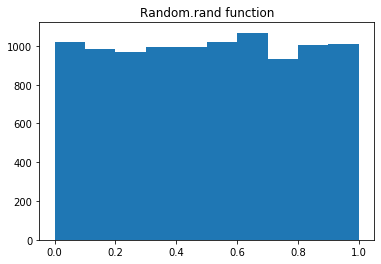

In [23]:
rand_f = np.random.rand(10000)
plt.hist(rand_f)
plt.title('Random.rand function')

plt.show()

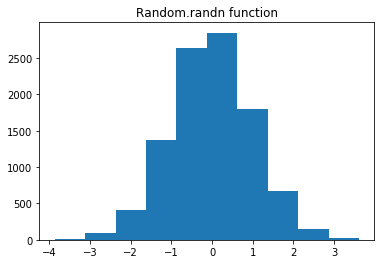

In [24]:
randn_f = np.random.randn(10000)
plt.hist(randn_f)
plt.title('Random.randn function')

plt.show()

From these two plots we can clearly see what is the difference between `rand()` and `randn()` functions`randn()` generates samples from the normal distribution, while `rand()` - from uniform.

<a id='permutations'></a>

### $\color{magenta}{\text{3.  Permutations}}$

<a id='shuffle'></a>

$\color{blue}{\textbf{Numpy.random.shuffle}}$

__The syntax of numpy.random.shuffle__

&emsp;&emsp;*numpy.random.shuffle(x)*

&emsp;&emsp;*x* - the array or list to be shuffled.

<br>

The `shuffle` function can be used to shuffle a list. The shuffle is performed in place, meaning that the list provided as an argument to the `shuffle` function is shuffled rather than a shuffled copy of the list being made and returned. This is sometimes useful if we want to sort a list in random order.

Let's go through some examples. In first example we will shuffle following 1D array:
      
      1 2 3 4 5 6 7 8 9

In [12]:
x = np.array([1,2,3,4,5,6,7,8,9])
np.random.shuffle(x)
x

array([9, 3, 8, 7, 6, 2, 4, 1, 5])

<br>

In this example we will be shuffling a 2D array:

        1 2 3
        4 5 6
        7 8 9

In [13]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(x)
x

array([[4, 5, 6],
       [1, 2, 3],
       [7, 8, 9]])

<br>

As we can see from the output in case of 2D (or more) array, the function `shuffle` is going to permute randomly the array rows, but not the order in the row. To randomly shuffle a 2D or more) array in Python, it is necessary to transform the multi-dimensional array to a 1D array (using `ravel` function), then using shuffle and reshape the array to its original shape:

In [14]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
x = x.ravel()
np.random.shuffle(x)
x = x.reshape(3, 3)
x

array([[8, 7, 4],
       [3, 2, 6],
       [9, 1, 5]])

<a id='distribitions'></a>

### $\color{magenta}{\text{4.  Probability Distributions}}$

A probability distribution is a list of all of the possible outcomes of a random variable along with their corresponding probability values.
A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range. This range will be bounded between the minimum and maximum possible values, but precisely where the possible value is likely to be plotted on the probability distribution depends on a number of factors. These factors include the distribution's `Mean` (average), `Standard Deviation`, `Skewness`, and `Kurtosis`.

<a id='normal'></a>

$\color{blue}{\textbf{Numpy.random.normal}}$

__The syntax of numpy.random.normal__

&emsp;&emsp;*numpy.random.normal([loc, scale, size])*

&emsp;&emsp;- *loc* (mean) - float or array_like of floats. <br>
&emsp;&emsp;- *scale* (standard deviation) - float or array_like of floats. <br>
&emsp;&emsp;- *size* - intiger, or tuple of intigers (optional). <br>

Normal distribution, also known as *__Gaussian distribution__*, is one of the most common distribution and is used for continuous variables. It is bell shaped curve which is neither too skewed not too flat and has parameters:   `Mean` and `Standard Deviation`.

`Mean` refers  average that is used to derive the central tendency of the data in question. It is determined by adding all the data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

`Standard Deviation (SD)` is a statistical measure that captures the difference between the average and the outliers in a set of data. In other words, standard deviation is a measure of how spread out numbers are.

The bell-shaped density curve is symmetrical, centred about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. 

*__Normal Distribution:__*
1.	 Symmetric around the mean i.e. all the basic summary stats: mean, median and mode lies at the center and are equal to each other
2.	 Standard deviation represents how closely packed or loosely floating are the data points to or away from the mean
3.	 Since the distribution is symmetric, so area under the curve is equal to 1
4.	 When   and   then the distribution is called *__Standard Normal Distribution__*

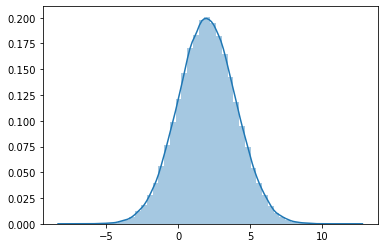

In [25]:
# Normal Distribution
#Initializing the parameters: mean and Standard Deviation (SD)

m1,sd1 = 2,2
normal= np.random.normal(m1, sd1, 200000)
sns.distplot(normal)

plt.show()

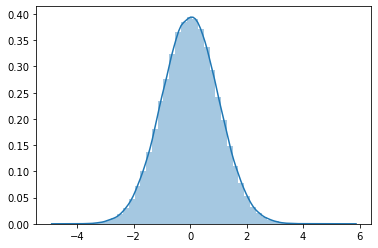

In [26]:
# Standard Normal Distribution
#Initializing the parameters: mean and SD

m2,sd2 = 0,1
std_normal= np.random.normal(m2, sd2, 200000)
sns.distplot(std_normal)

plt.show()

From these two plots we can see that the majority of the values are distributed around 2 in first case and around 0 in second case as the Mean value in first example is equal to 2, and in second example - mean = 0.

<a id='binomial'></a>

$\color{blue}{\textbf{Numpy.random.binomial}}$

__The syntax of numpy.random.binomial__

&emsp;&emsp;*numpy.random.binomial(n, p, size)*

&emsp;&emsp;- *n* (total number of trials) - intiger or array_like of intigers. <br>
&emsp;&emsp;- *p* (probability of success in each trial) - float or array_like of floats. <br>
&emsp;&emsp;- *size* - intiger, or tuple of intigers (optional). <br>

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is same for all the trials is called a `Binomial Distribution`. However, The outcomes need not be equally likely, and each trial is independent of each other. 

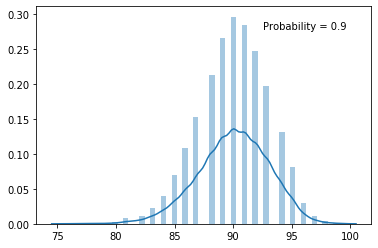

In [27]:
#Initializing the parameters: total number of trials, probability, and sample size

n, p, size = 100, 0.9, 10000
binom = np.random.binomial(n, p, size)
plt.figtext(0.65, 0.8, 'Probability = 0.9')
sns.distplot(binom)

plt.show()

Since the probability of success was greater than 0.5 (in our case is 0.9) the distribution is skewed towards the right side. If we change the probability value to 0.5 we will get symmetric distribution (see the plot below).

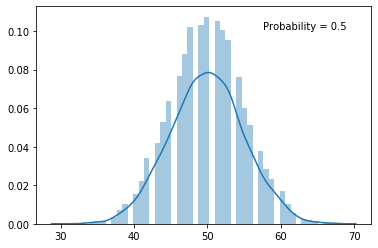

In [28]:
n, p, size = 100, 0.5, 10000
binom = np.random.binomial(n, p, size)
plt.figtext(0.65, 0.8, 'Probability = 0.5')
sns.distplot(binom)

plt.show()

<a id='poisson'></a>

$\color{blue}{\textbf{Numpy.random.poisson}}$

__The syntax of numpy.random.poisson__

&emsp;&emsp;*numpy.random.binomial(lam, size)*

&emsp;&emsp;- *lam* (lambda - event rate) - float or array_like of floats. Expectation of interval, should be >= 0. <br>
&emsp;&emsp;- *size* - intiger, or tuple of intigers (optional).<br>

Poisson distribution is a discrete probability distribution that shows how many times an event is likely to occur within a specified period of time. It is a binomial approximated distribution which occurs when number of trials (n) becomes sufficiently large and probability of success (p) successively becomes small such that np becomes lam (constant), the distribution becomes poisson.

*__Difference between Poisson and Normal distributions__*: A Poisson distribution is discrete while a normal distribution is continuous, and a Poisson random variable is always >= 0. When the mean of a Poisson distribution is large, it becomes similar to a normal distribution. 

Note that as lambda gets large, the distribution becomes more and more symmetric.  In fact, as lambda gets large (greater than around 10 or so), the Poisson distribution approaches the Normal distribution with mean=lambda, and variance=lambda.

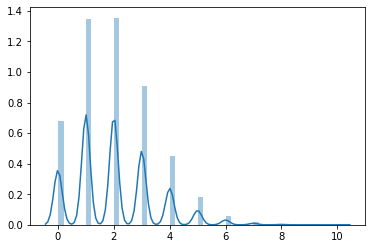

In [14]:
lam, p_size = 2, 100000
poisson = np.random.poisson(lam, p_size)
sns.distplot(poisson)
plt.show()

*__Difference between Poisson and Normal distributions__*: A Poisson distribution is discrete while a normal distribution is continuous, and a Poisson random variable is always >= 0. When the mean of a Poisson distribution is large, it becomes similar to a normal distribution. 

Note that as lambda gets large, the distribution becomes more and more symmetric.  In fact, as lambda gets large (greater than around 10 or so), the Poisson distribution approaches the Normal distribution with mean=lambda, and variance=lambda.

As the standard deviation is the square root of the variance, and in our case we assume that variance=lambda=100, then SD=10. Let's visualize this:

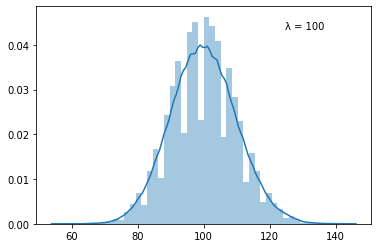

In [35]:
#Poisson distribution with large lamba = 100 and 100000 sample size:

lam, p_size = 100, 100000
poisson = np.random.poisson(lam, p_size)
plt.figtext(0.7, 0.8, '\u03BB = 100')
sns.distplot(poisson)

plt.show()

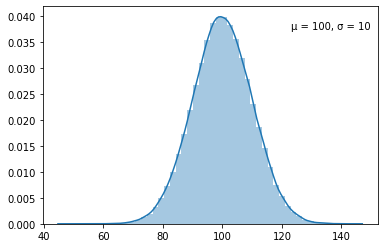

In [39]:
#Normal distribution with mean = 100, SD = 10 and 100000 sample size:

std_normal= np.random.normal(100, 10, 200000)
plt.figtext(0.7, 0.8, '\u03BC = 100, \u03C3 = 10')
sns.distplot(std_normal)

plt.show()

The visualization of two plots shows taht the Poisson distribution approaches the Normal distribution with mean=lambda, and variance=lambda.

<a id='gamma'></a>

$\color{blue}{\textbf{Numpy.random.gamma}}$

__The syntax of numpy.random.gamma__

&emsp;&emsp;*numpy.random.gamma(shape[,scale, size])*

&emsp;&emsp;- *shape* - float or array_like of floats. <br>
&emsp;&emsp;- *scale* - float or array_like of floats (optional). <br>
&emsp;&emsp;- *size* - intiger, or tuple of intigers (optional). <br>

Gamma distribution is a right skewed distribution used for continuous variables. This is due to its flexibility in the choice of the shape and scale parameters. The scale parameter determines where the bulk of the observations lies and the shape parameter determines how the distribution will look.

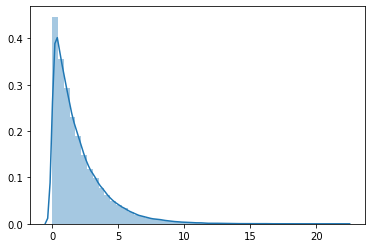

In [40]:
g_shape, g_scale, g_size = 1, 2, 100000
gamma = np.random.gamma(g_shape, g_scale, g_size)
sns.distplot(gamma)

plt.show()

If we change the value of the shape parameter, we can see how the distribition changes its look.

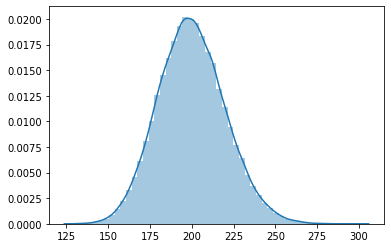

In [41]:
gamma = np.random.gamma(100, g_scale, g_size)
sns.distplot(gamma)

plt.show()

It is clear from the above graph that increasing the shape parameter, skewness of the distribution reduces.

<a id='exponential'></a>

$\color{blue}{\textbf{Numpy.random.exponential}}$

__The syntax of numpy.random.exponential__

&emsp;&emsp;*numpy.random.exponential(scale, size)*

&emsp;&emsp;- *scale* (probability of success in each trial) - float or array_like of floats. <br>
&emsp;&emsp;- *size* - intiger, or tuple of intigers (optional). <br>

The exponential distribution is a continuous probability distribution where a few outcomes are the most likely with a rapid decrease in probability to all other outcomes. In this distribution events occur continuously and independently at a constant average rate.

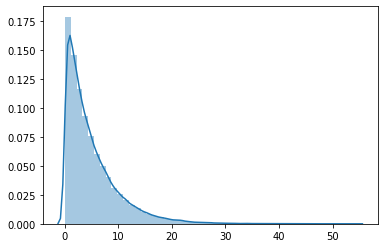

In [13]:
exp_scale, exp_size = 5, 100000
exp = np.random.exponential(exp_scale, exp_size)
sns.distplot(exp)

plt.show()

<a id='seeds'></a>

### $\color{magenta}{\text{5.  Seeds}}$

<a id='seed'></a>

$\color{blue}{\textbf{Numpy.random.seed}}$

__The syntax of *numpy.random.seed*__

&emsp;&emsp;*numpy.random.seed(seed_value)

&emsp;&emsp;*seed value* - the input value that will be used to "seed" pseudo-random generator. The number that will be used as a *seed_value* does not really make a difference. <br>

The `np.random.seed` function provides an input for the pseudo-random number generator in Python. Importantly, numpy.random.seed doesn’t exactly work all on its own.

The `numpy.random.seed` function works in conjunction with other functions from NumPy. Specifically, `numpy.random.seed` works with other function from the `numpy.random` namespace. So for example, we might use `numpy.random.seed` along with `numpy.random.randint`. This will enable you to create random integers with NumPy.

However, it's essential do not forget that the important thing about using a seed for a pseudo-random number generator is that it makes the code repeatable. If you give a pseudo-random number generator the same input, you’ll get the same output. What I mean is that if you run the algorithm with the same input, it will produce the same output. Let's test it out:

Let's create a list of 20 pseudo-random integers between 0 and 100 using `numpy.random.randint`, with `seed` equals to 0:

In [42]:
np.random.seed(0)
np.random.randint(100, size = 20)

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88])

<br>

Based on the output array there is no pattern visible here.

Let's run the same code again to test if we get the same output to prove our hypotesis that if we give a pseudo-random number generator the same input, we’ll get the same output:

In [43]:
np.random.seed(0)
np.random.randint(100, size = 20)

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88])

<br>

Ok. Maybe it works just for `numpy.random.randint`? Let's try to generate another random sample from an input array. For this purpose we’re going to use `numpy.random.seed` before we use `numpy.random.choice`. 

`numpy.random.choice` function will then create a random sample of 5 numbers from a given list of elements.

In [44]:
np.random.seed(0)
np.random.choice(a = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90], size = 5)

array([40, 70,  1,  4,  4])

<br>

Now we will re-run the same code:

In [45]:
np.random.seed(0)
np.random.choice(a = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90], size = 5)

array([40, 70,  1,  4,  4])

<br>

Let's change the seed value to 5 and re-run the code:

In [46]:
np.random.seed(5)
np.random.choice(a = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90], size = 5)

array([ 4, 60, 70,  7, 80])

<br>

As we can see the output is completely different to the first one with the seed value of 0. Let's run the code one more time:

In [47]:
np.random.seed(0)
np.random.choice(a = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90], size = 5)

array([40, 70,  1,  4,  4])

<br>

We got completely the same output as before. We can repeat the code as many times as we wish, but the outcome remains the same for the same value of `seed`. 

<span style="text-decoration:underline">__Conclusion:__</span> The “random” numbers generated by `numpy.random.seed` function are not exactly random. They look like random numbers, but are 100% determined by the input and the pseudo-random number algorithm. If you give a pseudo-random number generator the same `seed` value, you’ll get the same output. The `numpy.random.seed` function allows user to provide a `seed` value to NumPy’s random number generator.

<a id='ref'></a>

### $\color{magenta}{\text{6.  References}}$

 [1.&emsp; SciPy.org - Random Sampling](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) <br>
 [2.&emsp; NumPy random numbers](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781785285110/2/ch02lvl1sec16/numpy-random-numbers) <br>
 [3.&emsp; NumPy random seed](https://www.sharpsightlabs.com/blog/numpy-random-seed/) <br>
 [4.&emsp; Generating Random Data in Python (Guide)](https://realpython.com/python-random/) <br>
 [5.&emsp; How to Generate Random Numbers in Python](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) <br>
 [6.&emsp; Poisson, Exponential, and Gamma distributions](http://sherrytowers.com/2016/01/23/poisson-and-exponential-distributions/) <br>
 [7.&emsp; The Binomial Distribution](https://www.mathsisfun.com/data/binomial-distribution.html) <br>
 [8.&emsp; Normal distribution of random numbers](https://www.khanacademy.org/computing/computer-programming/programming-natural-simulations/programming-randomness/a/normal-distribution-of-random-numbers) <br>
 [9.&emsp; Random Distributions](https://rust-random.github.io/book/guide-dist.html) <br>
 [10.&emsp; Poisson Distribution / Poisson Curve: Simple Definition](https://www.statisticshowto.datasciencecentral.com/poisson-distribution/) <br>
 [11.&emsp; Gamma Distribution](https://brilliant.org/wiki/gamma-distribution/) <br>
 [12.&emsp; Exponential distribution](https://www.statlect.com/probability-distributions/exponential-distribution) <br>
 [13.&emsp; The Exponential Distribution](https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/) <br>
 [14.&emsp; open SAP course: Introduction to Statistics for Data Science](https://open.sap.com/courses/ds0/items/3G1VitcwwJTo4w6gfQSEzt/quiz_submission/3YIkL40PUyicYRkurTOEVc?highest_score=true) <br>
 [15.&emsp; Binomial Probability Distribution](https://stattrek.com/probability-distributions/binomial.aspx) <br>
 [16.&emsp; Binomial Distribution](http://onlinestatbook.com/2/probability/binomial.html) <br>
 [17.&emsp; Python numpy.random() Examples](https://www.programcreek.com/python/example/2295/numpy.random) <br>
 [18.&emsp; Probability distribution](https://www.investopedia.com/terms/p/probabilitydistribution.asp) <br>
 [19.&emsp; Markdown in Jupyter Notebook](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) <br>
 [20.&emsp; Markdown for Jupyter notebooks cheatsheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) <br>
 [21.&emsp; Markdown Cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) <br>
 [22.&emsp; How to write LaTeX in IPython Notebook?](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) <br>
 [22.&emsp; Unicode characters in Python](https://pythonforundergradengineers.com/unicode-characters-in-python.html) <br>